In [1]:
!pip install scikit-image watermark -q

# Install OpenCV package first
!pip install opencv-python -q

# First install the required system library
!apt-get update && apt-get install -y libgl1-mesa-glx

!pip install opencv-python


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Hit:1 http://deb.debian.org/debian bullseye InRelease
Hit:2 http://deb.debian.org/debian-security bullseye-security InRelease
Hit:3 http://deb.debian.org/debian bullseye-updates InRelease




libgl1-mesa-glx is already the newest version (20.3.5-1).
0 upgraded, 0 newly installed, 0 to remove and 75 not upgraded.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Importamos las librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Recorte, extracción y cambio de perspectiva

En esta sección vamos a recortar una de las cartas, extraerla y rotarla para que se vea de frente.

Para eso vamos a:

1. Identificar las cuatros esquinas de la carta en cuestión (Vamos a extraer el rey de picas del frente y rotarlo).
2. Crear una matriz de transformación de cambio perspectiva. Para esto especificaremos los puntos 4 puntos de origen y los 4 puntos de destino y vamos a llamar a `cv2.getPerspectiveTransform(pts1, pts2)` que va a construir la matriz que nos va a servir para realizar esta transformación

In [3]:
!wget https://i.pinimg.com/736x/ed/5f/9a/ed5f9a559c249ffda1334de1a080fe0f.jpg

--2025-05-05 06:35:58--  https://i.pinimg.com/736x/ed/5f/9a/ed5f9a559c249ffda1334de1a080fe0f.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.0.84, 151.101.192.84, 151.101.64.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.0.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59344 (58K) [image/jpeg]
Saving to: ‘ed5f9a559c249ffda1334de1a080fe0f.jpg’

ed5f9a559c249ffda13 100%[===================>]  57.95K  --.-KB/s    in 0.005s  

2025-05-05 06:35:58 (10.5 MB/s) - ‘ed5f9a559c249ffda1334de1a080fe0f.jpg’ saved [59344/59344]



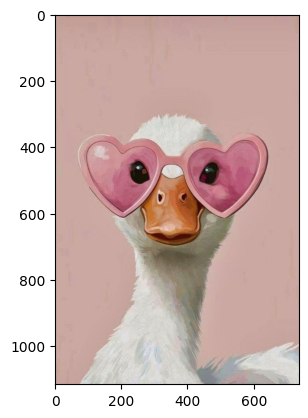

In [4]:
img = cv2.imread('pato.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

<img src="image-20250429-215346.png" width="" align="" />

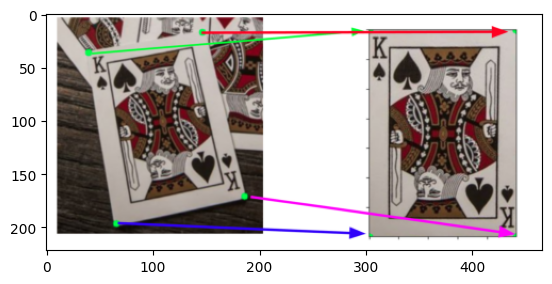

In [5]:
img = cv2.imread('cambio-perspectiva.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

3. Finalmente, vamos a aplicarla con `cv2.wrapPerspective()`, que va a extraer el area delimitada en la imagen original y aplicar la matriz de cambio de perspectiva para generar una imagen única recortada y con una nueva alineación.

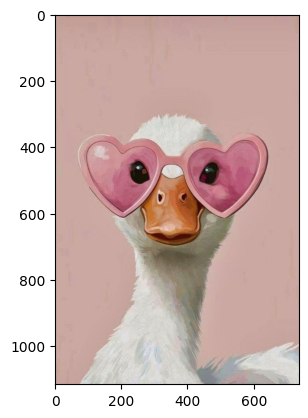

In [87]:
# Comencemos abriendo la imagen
img = cv2.cvtColor(cv2.imread("pato.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [90]:
img.shape

(1116, 736, 3)

Ahora vamos a identificar, a ojo, las coordenadas de las esquinas de la carta que queremos extraer y cambiar de perspectiva:

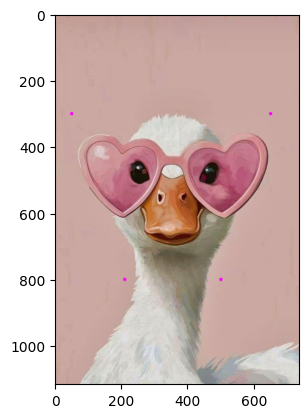

In [93]:
# Primero coordenada x, despues coordenada y
corners = [(50, 300), # Superior izquierdo
           (210, 800), # Inferior izquierdo
           (650, 300), # Superior derecho
           (500, 800) # Inferior derecho
          ]

for x, y in corners:
    cv2.circle(img, (x,y), radius=0, color=(255, 0, 255), thickness=10)
plt.imshow(img);

Creamos la matriz de cambio de perspectiva. Para eso, especificamos los puntos originales y a donde va a ir cada uno en la imagen final. Debemos decidir el tamaño de la imagen final

In [135]:
w, h = 650, 500

In [138]:
pts1 = np.float32(corners)
# Para los puntos de destino, debe preservarse el orden de los puntos originales
pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])

In [141]:
# Obtenemos la matriz de cambio de perspectiva
matrix = cv2.getPerspectiveTransform(pts1, pts2)

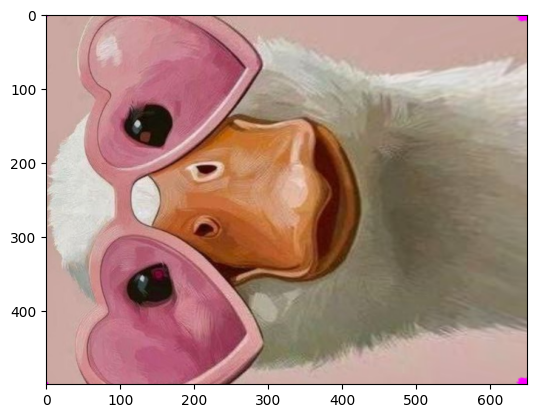

In [144]:
# Y la aplicamos con warpPerspective
# El segundo parametro es esta matriz y el tercero debe ser una tupla con especificando (ancho, alto)
# Primero creamos la matriz de transformación que faltaba
matrix = cv2.getPerspectiveTransform(pts1, pts2)

# Luego aplicamos la transformación
img_output = cv2.warpPerspective(img, matrix, (w, h))
plt.imshow(img_output);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>